In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)
pd.set_option('display.width', 200)

In [2]:
# Check the installed versions of Bokeh and Seaborn

from bokeh import __version__ as bokeh_version
print("Bokeh - %s" % bokeh_version)              
from seaborn import __version__ as seaborn_version
print("Seaborn - %s" % seaborn_version)   

Bokeh - 0.12.9
Seaborn - 0.8.0


In [3]:
# Import the required libraries for seaborn and bokeh

import seaborn as sns
from bokeh.plotting import figure
from bokeh.io import show

In [4]:
# Download the sample data from the bokeh library

#import bokeh.sampledata
#bokeh.sampledata.download() 

In [5]:
gbd = pd.read_csv("data/IHME_GBD_2010.csv")  # Load the data
gbd.head()                                   # Prints the first 5 observations

  Country Code Country Name  Year  Age Group     Sex Number of Deaths Death Rate Per 100,000
0          AFG  Afghanistan  1970   0-6 days    Male           19,241             318,292.90
1          AFG  Afghanistan  1970   0-6 days  Female           12,600             219,544.20
2          AFG  Afghanistan  1970   0-6 days    Both           31,840             270,200.70
3          AFG  Afghanistan  1970  7-27 days    Male           15,939              92,701.00
4          AFG  Afghanistan  1970  7-27 days  Female           11,287              68,594.50

In [6]:
gbd.dtypes    # Check the data types of the colums in the dataset

Country Code              object
Country Name              object
Year                       int64
Age Group                 object
Sex                       object
Number of Deaths          object
Death Rate Per 100,000    object
dtype: object

In [7]:
# Convert the dtype of a column from object to float64 to get the right results. 

gbd['Number of Deaths'] = gbd['Number of Deaths'].str.replace(',', '')
gbd['Death Rate Per 100,000'] = gbd['Death Rate Per 100,000'].str.replace(',', '')
gbd['Number of Deaths'] = pd.to_numeric(gbd['Number of Deaths'])
gbd['Death Rate Per 100,000'] = pd.to_numeric(gbd['Death Rate Per 100,000'])

gbd.head()

  Country Code Country Name  Year  Age Group     Sex  Number of Deaths  Death Rate Per 100,000
0          AFG  Afghanistan  1970   0-6 days    Male             19241                318292.9
1          AFG  Afghanistan  1970   0-6 days  Female             12600                219544.2
2          AFG  Afghanistan  1970   0-6 days    Both             31840                270200.7
3          AFG  Afghanistan  1970  7-27 days    Male             15939                 92701.0
4          AFG  Afghanistan  1970  7-27 days  Female             11287                 68594.5

In [8]:
gbd.dtypes 

Country Code               object
Country Name               object
Year                        int64
Age Group                  object
Sex                        object
Number of Deaths            int64
Death Rate Per 100,000    float64
dtype: object

In [9]:
# Rename columns
gbd.columns = ['country_code', 'country_name', 'year', 'age_group', 'sex', 'deaths', 'death_rate']
print(gbd.columns)

Index(['country_code', 'country_name', 'year', 'age_group', 'sex', 'deaths', 'death_rate'], dtype='object')


In [10]:
grouped_by_country = gbd.groupby('country_name')
deaths_by_country = grouped_by_country['deaths'].sum()
deaths_by_country

country_name
Afghanistan                                     5687183
Albania                                          349413
Algeria                                         3322568
Andorra                                            8215
Angola                                          3405986
Antigua and Barbuda                                8856
Argentina                                       5021838
Armenia                                          478304
Australia                                       2508926
Austria                                         1703462
Azerbaijan                                      1114032
Bahamas                                           31294
Bahrain                                           39052
Bangladesh                                     21570855
Barbados                                          43613
Belarus                                         2259702
Belgium                                         2209679
Belize                             

In [11]:
# Removed rows containing 'Sex' as 'Both' as it contained sum of 'Number of deaths' of both males and females

gbd = gbd.loc[gbd['sex'] != 'Both']
gbd = gbd.loc[gbd['age_group'] != 'All ages']
gbd.head()      # Removed rows containing 'Sex' as 'Both' as it contained sum of 'Number of deaths' of both males and females

  country_code country_name  year    age_group     sex  deaths  death_rate
0          AFG  Afghanistan  1970     0-6 days    Male   19241    318292.9
1          AFG  Afghanistan  1970     0-6 days  Female   12600    219544.2
3          AFG  Afghanistan  1970    7-27 days    Male   15939     92701.0
4          AFG  Afghanistan  1970    7-27 days  Female   11287     68594.5
6          AFG  Afghanistan  1970  28-364 days    Male   37513     15040.1

In [12]:
grouped_by_year = gbd.groupby('year')
deaths_by_year = grouped_by_year['deaths'].sum()
deaths_by_year

year
1970    43216558
1980    43941805
1990    46425545
2000    51013144
2010    52641962
Name: deaths, dtype: int64

In [13]:
grouped_by_age = gbd.groupby('age_group')
deaths_by_age = grouped_by_age['deaths'].sum()
deaths_by_age

age_group
0-6 days       14939556
1-4 years      18341382
10-14 years     2257427
15-19 years     3584038
20-24 years     4686614
25-29 years     4939517
28-364 days    17858532
30-34 years     5150472
35-39 years     5859312
40-44 years     6660450
45-49 years     8032675
5-9 years       3429181
50-54 years    10081494
55-59 years    12401154
60-64 years    15607129
65-69 years    18101174
7-27 days       6395826
70-74 years    20544807
75-79 years    20623981
80+ years      37744293
Name: deaths, dtype: int64

In [14]:
grouped_by_country = gbd.groupby('country_name')
deaths_by_country = grouped_by_country['deaths'].sum()
deaths_by_country

country_name
Afghanistan                                    1421793
Albania                                          87349
Algeria                                         830646
Andorra                                           2044
Angola                                          851498
Antigua and Barbuda                               2211
Argentina                                      1255462
Armenia                                         119578
Australia                                       627232
Austria                                         425868
Azerbaijan                                      278510
Bahamas                                           7823
Bahrain                                           9761
Bangladesh                                     5392723
Barbados                                         10902
Belarus                                         564926
Belgium                                         552425
Belize                                            60

In [15]:
grouped_by_sex = gbd.groupby('sex')
deaths_by_sex = grouped_by_sex['deaths'].sum()
deaths_by_sex

sex
Female    109268759
Male      127970255
Name: deaths, dtype: int64

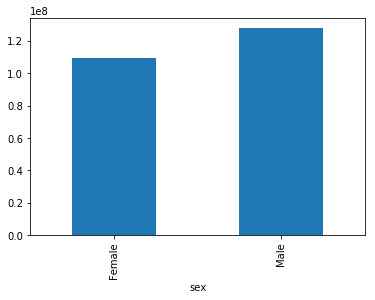

In [16]:
gbd.groupby('sex')['deaths'].sum().plot(kind='bar')

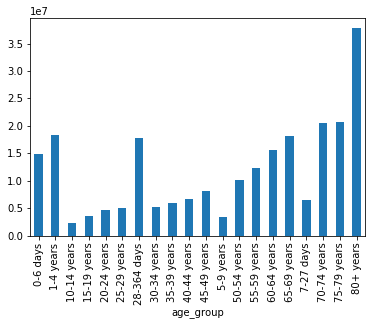

In [17]:
gbd.groupby('age_group')['deaths'].sum().plot(kind='bar')

In [ ]:
gbd.groupby('year')['deaths'].sum().plot(kind='bar')

In [ ]:
death_counts = pd.crosstab([gbd.year, gbd.sex], gbd.deaths)
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)